In [28]:
import pandas as pd
from sodapy import Socrata
from config import CHI_API_KEY

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", app_token = CHI_API_KEY)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("85ca-t3if", limit= 400000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [29]:
results_df.describe

<bound method NDFrame.describe of                                           crash_record_id  \
0       822071ff9ae3c358868e94ba1e84b9f6b8aae488f71777...   
1       bb7ff7e48e42c6bc5b046bc1674570883840a0ccb8d354...   
2       857f2ec880ea115e339d866732db6a4fc6d79b15835b6f...   
3       318ed4b903a9e91798fe1ffbb364db2c846d76f338a4a2...   
4       bfbb752103ad1780c0b782cc6b0e6d3800ef6e034d1a55...   
...                                                   ...   
399995  4bed960a4d16d1c73bcdf9fe36b8f2f31ebbf7c91a5acd...   
399996  322e5e09e10cbf113621e76d95e0f73fed609cacf49636...   
399997  d3e40bf75fdec52b1e88e739b1f84b1c09dc05aa49dafd...   
399998  71f27370ec9d58ef215a970529850ca3ad12656f03f91a...   
399999  6e44d7693af06a359b152aea1af85e7a2fbcf1c92321e4...   

                     crash_date posted_speed_limit traffic_control_device  \
0       2020-10-05T23:30:00.000                 10            NO CONTROLS   
1       2020-10-05T22:56:00.000                 30      STOP SIGN/FLASHER   
2 

In [49]:
accidents = results_df
accidents.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,crash_date_est_i,hit_and_run_i,photos_taken_i,statements_taken_i,work_zone_i,dooring_i,work_zone_type,workers_present_i,rd_no,lane_cnt
0,822071ff9ae3c358868e94ba1e84b9f6b8aae488f71777...,2020-10-05 23:30:00,10,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bb7ff7e48e42c6bc5b046bc1674570883840a0ccb8d354...,2020-10-05 22:56:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,857f2ec880ea115e339d866732db6a4fc6d79b15835b6f...,2020-10-05 22:31:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,318ed4b903a9e91798fe1ffbb364db2c846d76f338a4a2...,2020-10-05 22:08:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bfbb752103ad1780c0b782cc6b0e6d3800ef6e034d1a55...,2020-10-05 20:45:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
accidents['crash_date'] = pd.to_datetime(accidents['crash_date'])

In [37]:
import datetime

In [43]:
post_covid_accidents = accidents.loc[accidents['crash_date'] >= '03-20-2020']
pre_covid_accidents = accidents.loc[accidents['crash_date'] < '03-20-2020']

In [56]:
# To get a rough look at our data we can resample it on a weekly basis to get an estimate of pre and post-covid crashdates
pre_weekly = pre_covid_accidents.resample('W', on="crash_date").count()
post_weekly = post_covid_accidents.resample('W', on="crash_date").count()

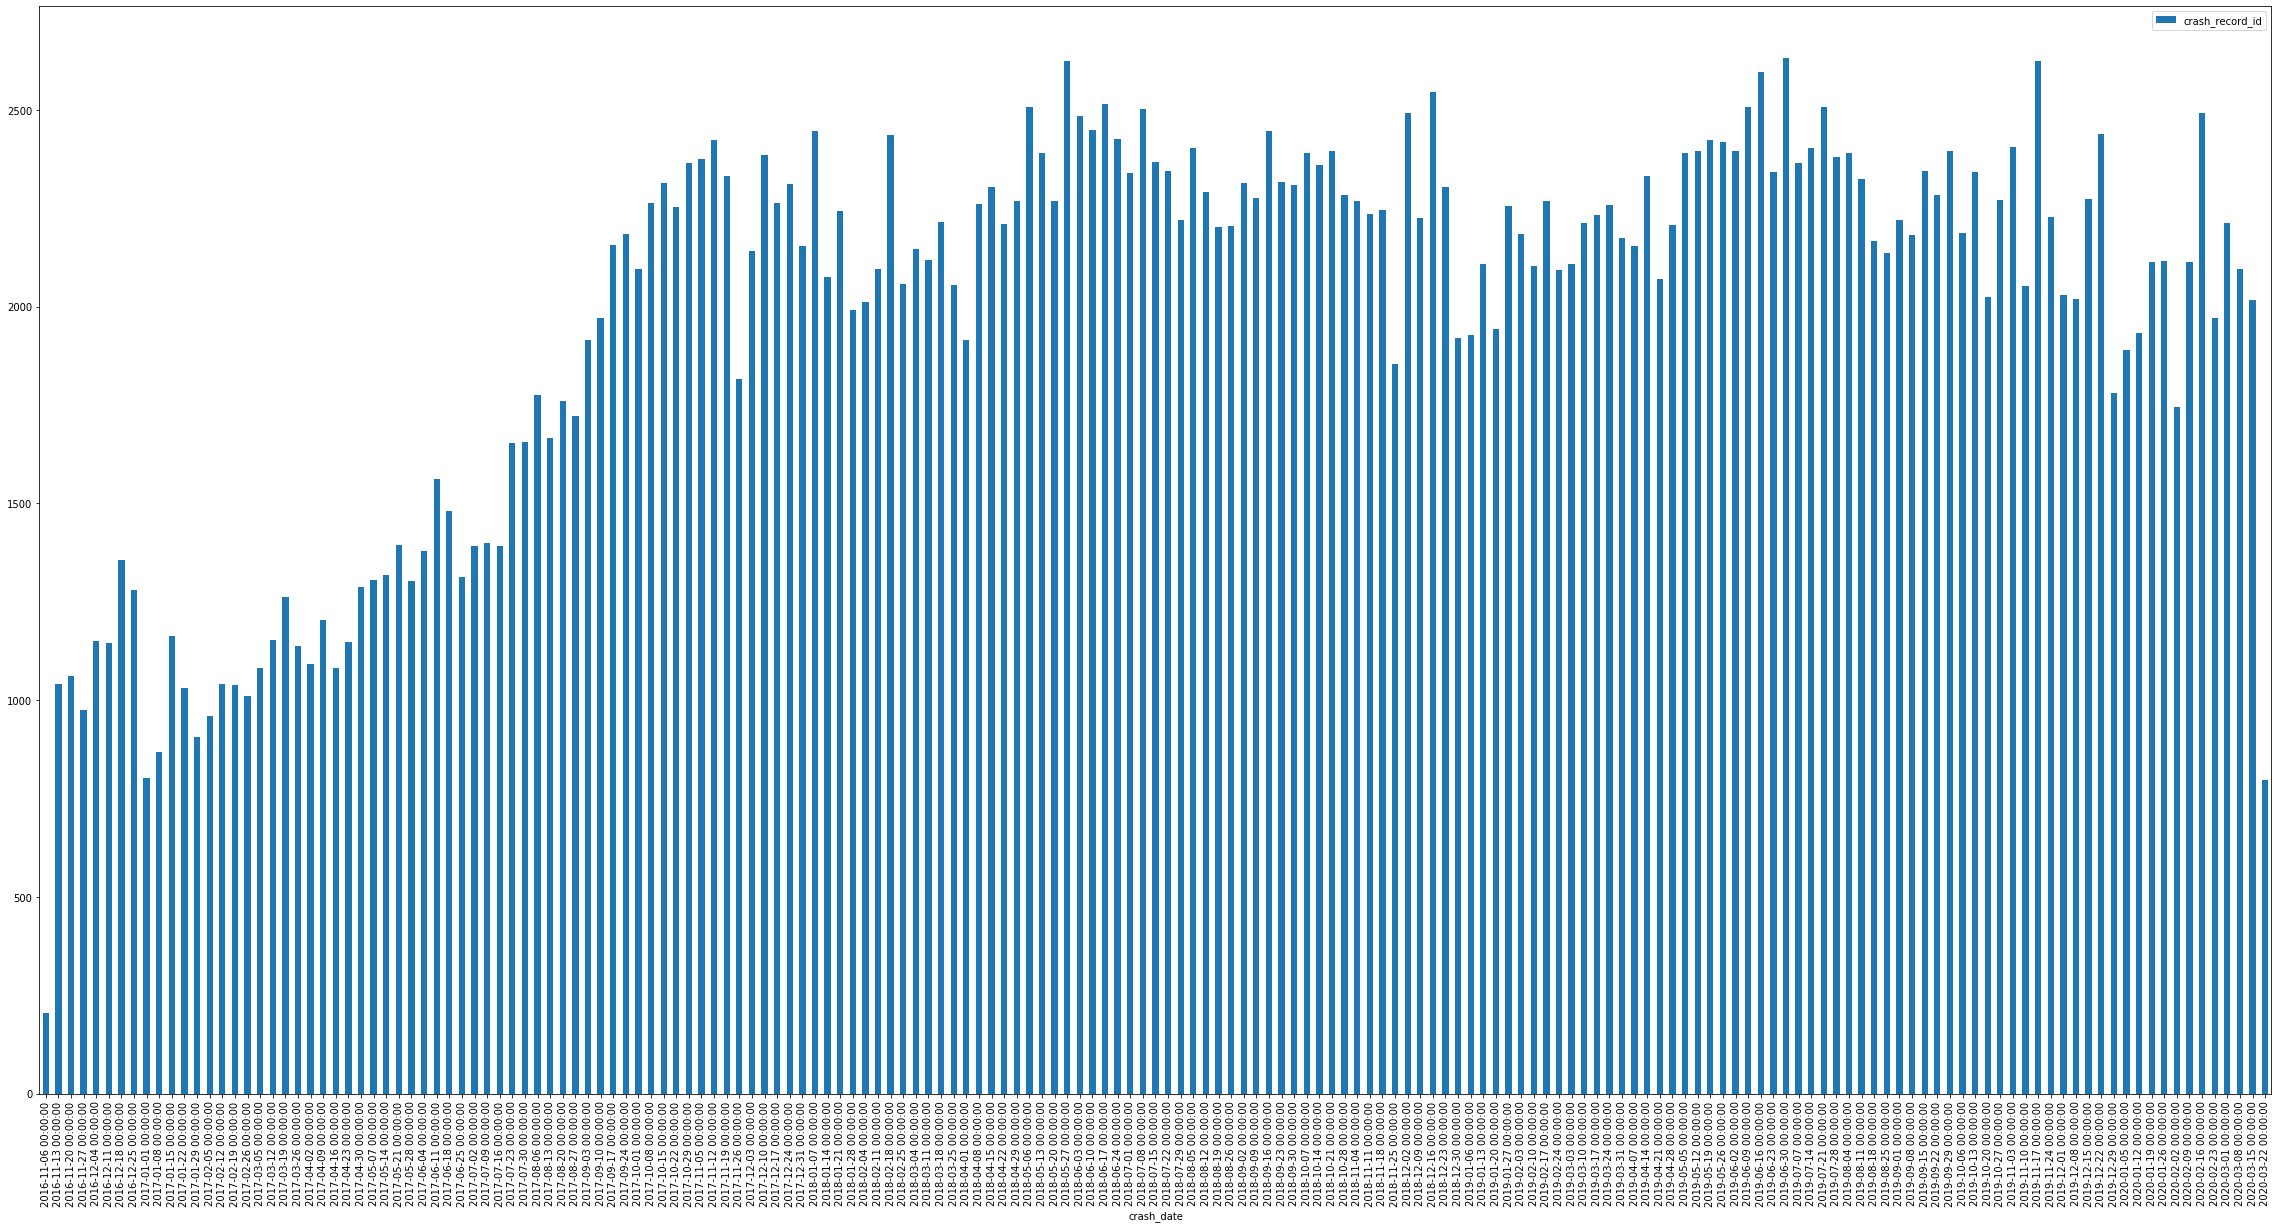

In [76]:
pre_weekly.plot.bar(y = 'crash_record_id', figsize =(40,20));

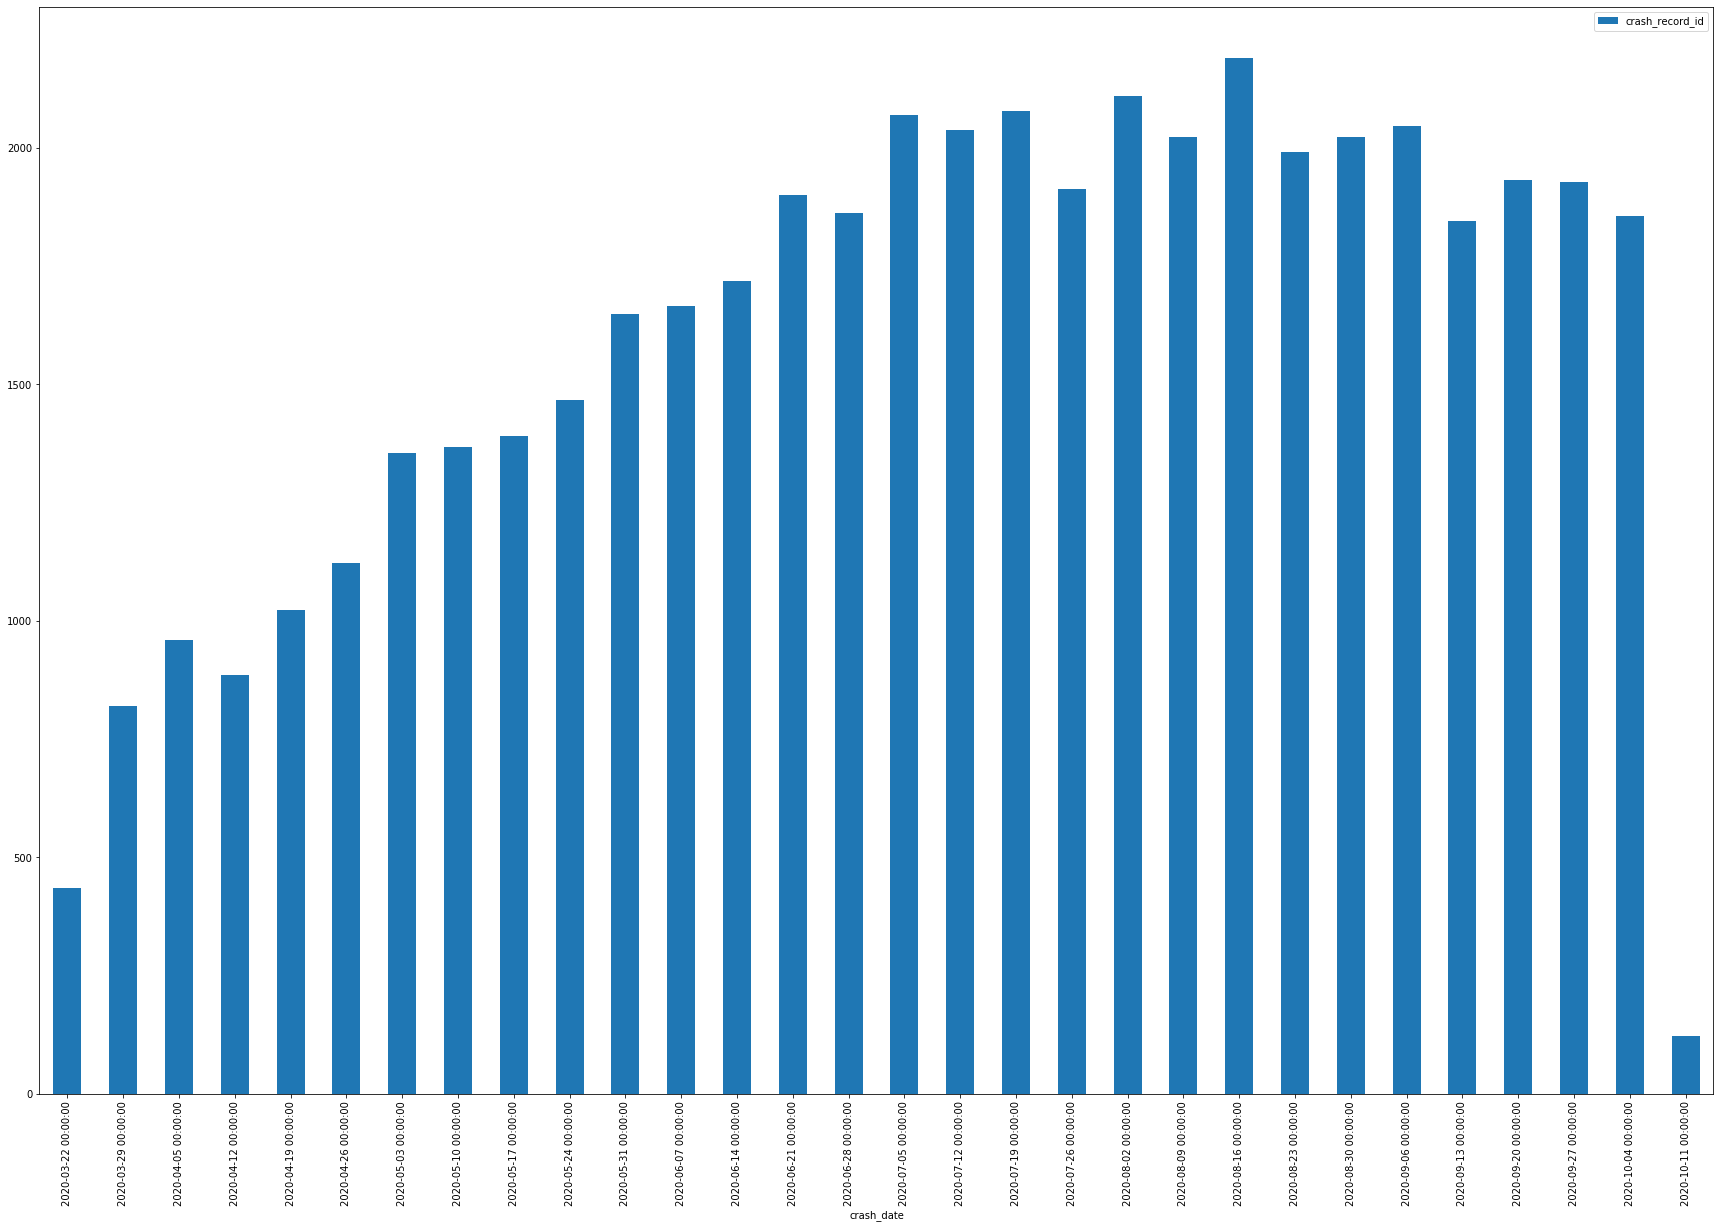

In [77]:
post_weekly.plot.bar(y = 'crash_record_id', figsize=(30,20));

In [78]:
test = client.get("85ca-t3if", limit= 100)

In [79]:
test

[{'crash_record_id': '822071ff9ae3c358868e94ba1e84b9f6b8aae488f71777559534812a1195602b4bc632ae43128e6e9866e58931e186b9c98ff846e3280a0abd5819ff35334553',
  'crash_date': '2020-10-05T23:30:00.000',
  'posted_speed_limit': '10',
  'traffic_control_device': 'NO CONTROLS',
  'device_condition': 'NO CONTROLS',
  'weather_condition': 'CLEAR',
  'lighting_condition': 'DARKNESS, LIGHTED ROAD',
  'first_crash_type': 'FIXED OBJECT',
  'trafficway_type': 'OTHER',
  'alignment': 'STRAIGHT AND LEVEL',
  'roadway_surface_cond': 'SAND, MUD, DIRT',
  'road_defect': 'NO DEFECTS',
  'report_type': 'NOT ON SCENE (DESK REPORT)',
  'crash_type': 'NO INJURY / DRIVE AWAY',
  'private_property_i': 'N',
  'damage': '$501 - $1,500',
  'date_police_notified': '2020-10-06T00:01:00.000',
  'prim_contributory_cause': 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
  'sec_contributory_cause': 'NOT APPLICABLE',
  'street_no': '6227',
  'street_direction': 'N',
  'street_name': 'SHERIDAN RD',
  'beat_of_occurre